In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
data = pd.read_csv("diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
attributes = data.drop("Outcome", axis=1)
target = data["Outcome"]

x_train, x_test, y_train, y_test = train_test_split(attributes, target, test_size=0.15, random_state=42)

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
model = KNeighborsClassifier(
    n_neighbors=42, 
    weights='uniform', 
    algorithm='auto', 
    leaf_size=30, 
    p=2, 
    metric='euclidean'
)

model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=42)

In [32]:
model.score(x_test, y_test)

0.75

In [33]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        76
           1       0.72      0.45      0.55        40

    accuracy                           0.75       116
   macro avg       0.74      0.68      0.69       116
weighted avg       0.75      0.75      0.73       116



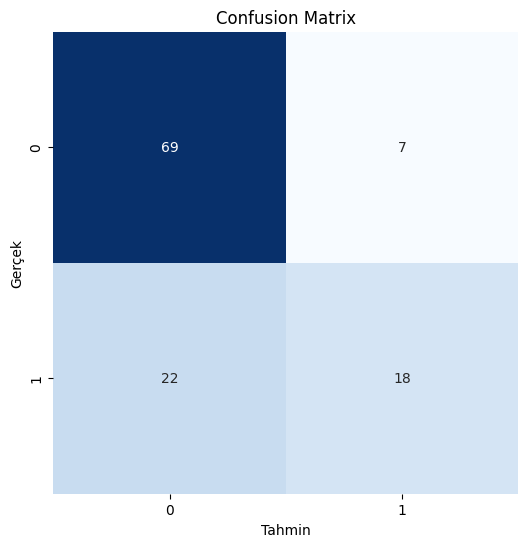

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

In [17]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [37]:
from knn_objective_function import knn_diabetes_function

result = knn_diabetes_function(
    attributes=data.drop("Outcome", axis=1), 
    target=data["Outcome"]
)
print(result)

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        99
           1       0.76      0.45      0.57        55

    accuracy                           0.75       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.75      0.75      0.73       154

